# wine dataset 분류하기

## import modules

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## load dataset
    * feature exploaration
    * feature selection

In [2]:
wine = load_wine()

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
print(wine.feature_names)
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

* 총 178개의 data가 있고, 각 label 당 data는 59, 71, 48개 있는 불균형 데이터셋이다.
* 각 data마다 13개의 feature이 있는 것을 확인했다.
* feature마다 SD의 차이가 심하므로, 정규화가 필요하다.
* label은 0, 1, 2의 숫자이다.
* feature selection이 필요할 수 있다.

In [8]:
wine.data.shape

(178, 13)

마지막 3개의 데이터를 살펴보자

In [9]:
import numpy as np
np.set_printoptions(suppress=True)

for i in range(3):
     print(np.asarray(wine.data)[-1-i], sep='\n')

[ 14.13   4.1    2.74  24.5   96.     2.05   0.76   0.56   1.35   9.2
   0.61   1.6  560.  ]
[ 13.17   2.59   2.37  20.   120.     1.65   0.68   0.53   1.46   9.3
   0.6    1.62 840.  ]
[ 13.27   4.28   2.26  20.   120.     1.59   0.69   0.43   1.35  10.2
   0.59   1.56 835.  ]


pandas로 전처리할 수 있도록 import 한다

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
original_data = wine.data

In [12]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

In [13]:
df_wine.tail(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


## Feature Selection

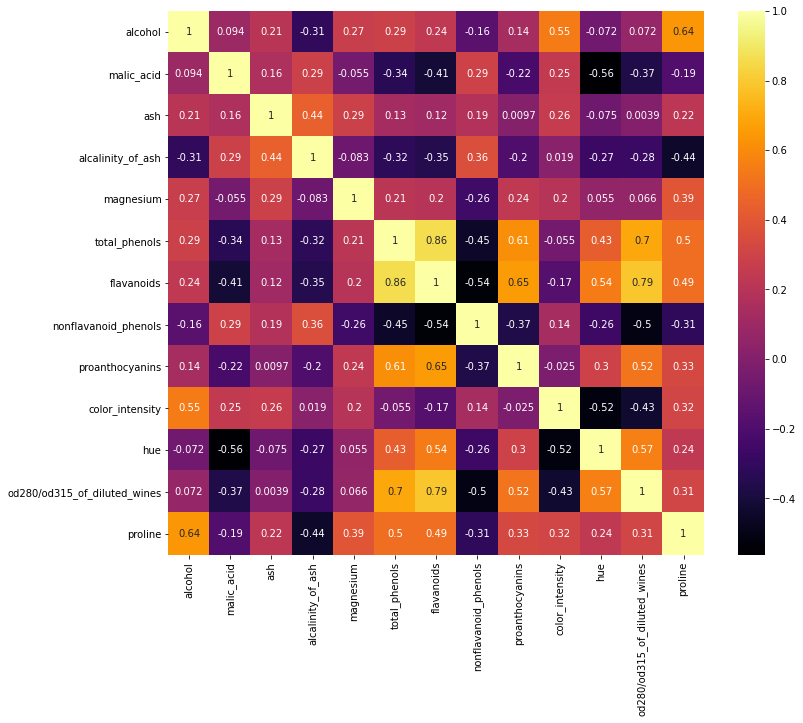

In [14]:
# 상관계수를 확인한다
plt.figure(figsize=(12,10))
cor = df_wine.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.inferno)
plt.show()

In [19]:
# Classifiaction이므로, target과의 상관계수는 의미가 없고, RFE를 시도해본다
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         5

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.90        18
weighted avg       0.89      0.89      0.89        18



**feature중 중요한 4개를 선택하여 예측한 model이 validation에서 모두 예측해내는 매우 좋은 성능을 보여주었다. test set으로 평가를 바로 진행한다**

**결과: test set에서도 모두 예측해내었으나 random_state에 따라 예측의 성능이 달라지는 variance가 큰 모델이었다**

* validation accuracy : 0.89..1.00

**따라서 더욱 안정적인 성능을 보이는 모델이 필요하다**

In [20]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       0.89      0.80      0.84        10

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



## Splitting Data

validation, test를 하기 위해 10%는 validation으로, 20%는 test로 활용한다.

In [15]:
X, y = load_wine(return_X_y=True)

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=42, stratify=y_trainval)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, sep='\n')

(124, 13)
(18, 13)
(36, 13)


## Training Model -without RFE

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [22]:
# DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=36)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5

    accuracy                           0.89        18
   macro avg       0.90      0.88      0.89        18
weighted avg       0.90      0.89      0.89        18



In [23]:
# RandomForestClassifier


random_forest = RandomForestClassifier(random_state=36)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [24]:
# SupportVectorClassifier


svm_model = svm.SVC(random_state=36)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         5

    accuracy                           0.67        18
   macro avg       0.45      0.61      0.52        18
weighted avg       0.49      0.67      0.56        18



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Stochastic Gradient Descent
# 일반적인 머신러닝 모델에 SGD 기법을 사용합니다.


sgd_model = SGDClassifier(random_state=36)
sgd_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         5

    accuracy                           0.67        18
   macro avg       0.45      0.61      0.52        18
weighted avg       0.49      0.67      0.56        18



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Logistic Regression


log_model = LogisticRegression(solver='liblinear',random_state=36)  # 작은 dataset에는 liblnear 메소드가 낫다고 한다
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18



validation 기준으로, SGD model과 SVM model은 class_2 를 맞게 예측해내지 못하는 성능을 보여주었다. RFE를 사용하여 feature 숫자를 줄인다면 어떻게 될지 확인해보자.

## Train Model - with RFE

In [27]:
# DecisionTree pipeline
rfe = RFE(estimator=DecisionTreeClassifier(random_state=36), n_features_to_select=4)
model = DecisionTreeClassifier(random_state=36)
decision_tree_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
decision_tree_pipeline.fit(X_train, y_train)
y_pred = decision_tree_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [28]:
# RandomForest pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=4)
model = RandomForestClassifier(random_state=36)
random_forest_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
random_forest_pipeline.fit(X_train, y_train)
y_pred = random_forest_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [29]:
# StochasticGradient pipeline
rfe = RFE(estimator=SGDClassifier(random_state=36), n_features_to_select=4)
model = SGDClassifier(random_state=36)
sgd_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
sgd_pipeline.fit(X_train, y_train)
y_pred = sgd_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.86      0.86      0.86         7
           2       1.00      0.80      0.89         5

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



In [30]:
# LogisticRegression
rfe = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=11)
model = LogisticRegression(random_state=36, solver='liblinear')
logistic_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
logistic_pipeline.fit(X_train, y_train)
y_pred = logistic_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### 성능 향상이 이루어졌다.  또한 k의 값에 따라서 acc가 크게 변하는 것을 알 수 있었다. 이를 시각화한다면 다음과 같다

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as accuracy
from collections import defaultdict


def get_acc(max_k=10, *, X=X_val, y=y_val):
    accs = defaultdict(list)
    for k in range(max_k):
        rfe_dt = RFE(estimator=DecisionTreeClassifier(random_state=36), n_features_to_select=k+1)
        rfe_rf = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=k+1)
        rfe_sgd = RFE(estimator=SGDClassifier(random_state=36), n_features_to_select=k+1)
        rfe_log = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=k+1)
        
        model_dt = DecisionTreeClassifier(random_state=36)
        model_rf = RandomForestClassifier(random_state=36)
        model_sgd = SGDClassifier(random_state=36)
        model_log = LogisticRegression(solver='liblinear',random_state=36)
        
        decision_tree_pipeline = Pipeline(steps=[('s',rfe_dt),('m',model_dt)])
        random_forest_pipeline = Pipeline(steps=[('s',rfe_rf),('m',model_rf)])
        sgd_pipeline = Pipeline(steps=[('s',rfe_sgd),('m',model_sgd)])
        logistic_pipeline = Pipeline(steps=[('s',rfe_log),('m',model_log)])
        
        pipelines = [decision_tree_pipeline, random_forest_pipeline, sgd_pipeline, logistic_pipeline]
        for pipeline in pipelines:
            model_fit = pipeline.fit(X_train, y_train)
            y_pred = model_fit.predict(X)
            acc = accuracy(y, y_pred)
            m = str(pipeline.steps[1][1])
            accs[m].append(acc)
    return accs

            
def plot_acc(accs, *, set_title="Validation Accuracy"):
    plt.figure(figsize=(15, 10))
    for key, acc_list in accs.items():
        plt.plot(range(1,len(acc_list)+1), acc_list, label=key)
    plt.title(set_title)
    plt.grid()
    plt.xlabel("Number of selected features  (k)")
    plt.legend()
    plt.show()

In [32]:
acc12 = get_acc(12)

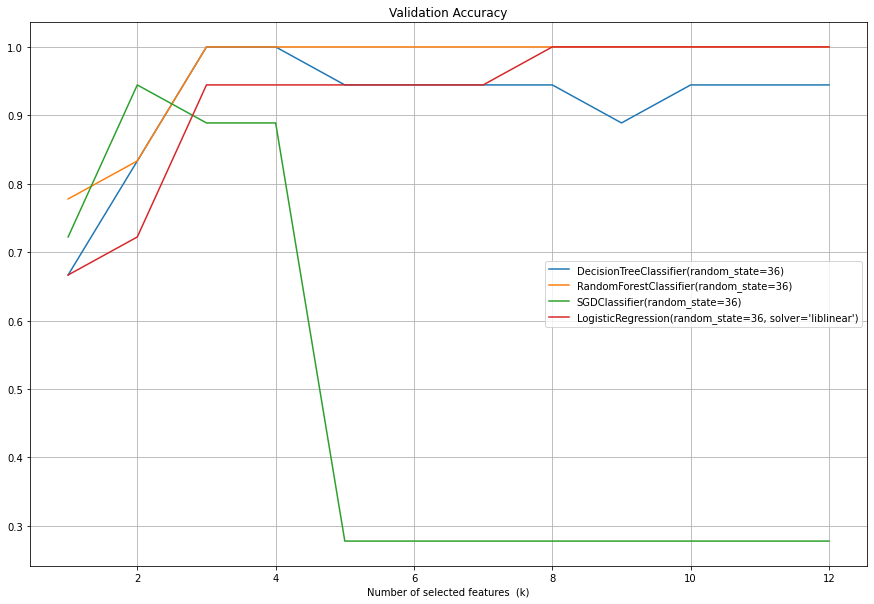

In [33]:
plot_acc(acc12)

#### SGD의 경우, 특성을 5개 이상 고려할 시, 0.28의 acc를 보였고, 나머지 분류기는 고려하는 특성이 많아지더라도 일관된 일반화 성능을 보였다.

## Model Test

### test_set에서는 잘 작동하는지 확인한다.

In [34]:
test_acc = get_acc(12, X=X_test, y=y_test)

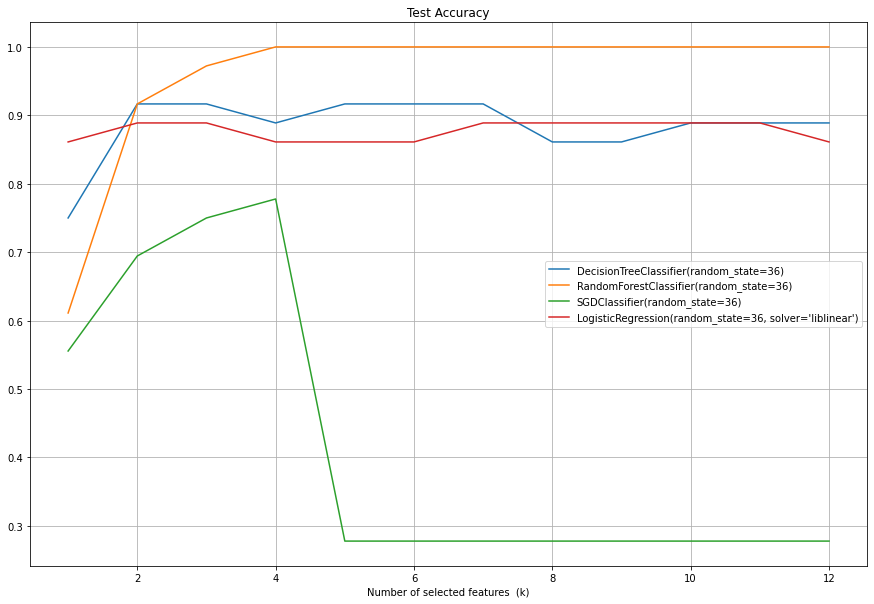

In [35]:
plot_acc(test_acc, set_title="Test Accuracy")

## 분석

* Precision: FP가 작을수록 큰 값이 나온다. 즉, 실제로 음성인데 양성으로 예측하는 경우가 적을수록 크다.
* Recall: FN이 작을수록 큰 값이 나온다. 즉, 실제로 양성인데 음성으로 예측하는 경우가 적을수록 크다.

wine의 경우, 클래스 간 불균형 (약 6:7:5)이 있다. 그것에 대한 가중치를 준다면 좋겠지만 어떻게 해야할지 몰라 불균형은 무시하고 모델 성능을 평가했다. 또한 FP, FN을 줄이는 것보다는 Accuaracy를 metric으로 사용한 이유는 와인 분류 대회가 있다면 그 대회는 Accuracy를 사용할 것 같았기 때문이다. 
validation set 기준으로 가장 먼저 최고 성능에 도달하고 일관된 성능을 보여준 특성 3~4개로 fit한 RandomForest가 성능이 좋을 것으로 예측된다.

# 결론

특성 3~4개로 fit한 RandomForest가 일반화 성능이 가장 좋다